In [1]:
import numpy as np
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import PatcherBot as pb
import pandas as pd
from glob import glob
import h5py
import os
import matplotlib.pyplot as plt


In [2]:
# def get_peak_idx(trace,samples_per_ms = 40.0):
#     peak_indices = np.where(trace==1) # All indices with value equal to 1 (high)
#     peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
#     # Note the first peak was counted in different way: it's counted because it's subtracting the last value
#     # in the list and the result is not equal to 1.
#     peak_index = peak_indices[0][peak_index]
#     # peak_indices[0]: remove tuple format
#     peak_index = peak_index/samples_per_ms
#     for idx in range(peak_index.shape[0]):
#         if peak_index[idx]>=500.0:
#             break
#         else:
#             continue
#     stim_timing = peak_index[idx]
#     return peak_index,idx,stim_timing

In [26]:
imgPath = '/Volumes/genie/BenArthur/patch-screen/bot'
rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'

In [27]:
date_path = pb.getPathInfo(imgPath)
datePath = []
for date in date_path:
    if len(date)!=14:
        continue
    datePath.append(date)

In [28]:
datePath = datePath[:10]
datePath

['2019.09.25_000',
 '2019.09.26_000',
 '2019.10.03_000',
 '2019.10.04_000',
 '2019.10.17_000',
 '2019.10.21_000',
 '2019.10.22_000',
 '2019.10.23_000',
 '2019.12.06_000',
 '2020.01.16_000']

ValueError: num must be 1 <= num <= 50, not 51

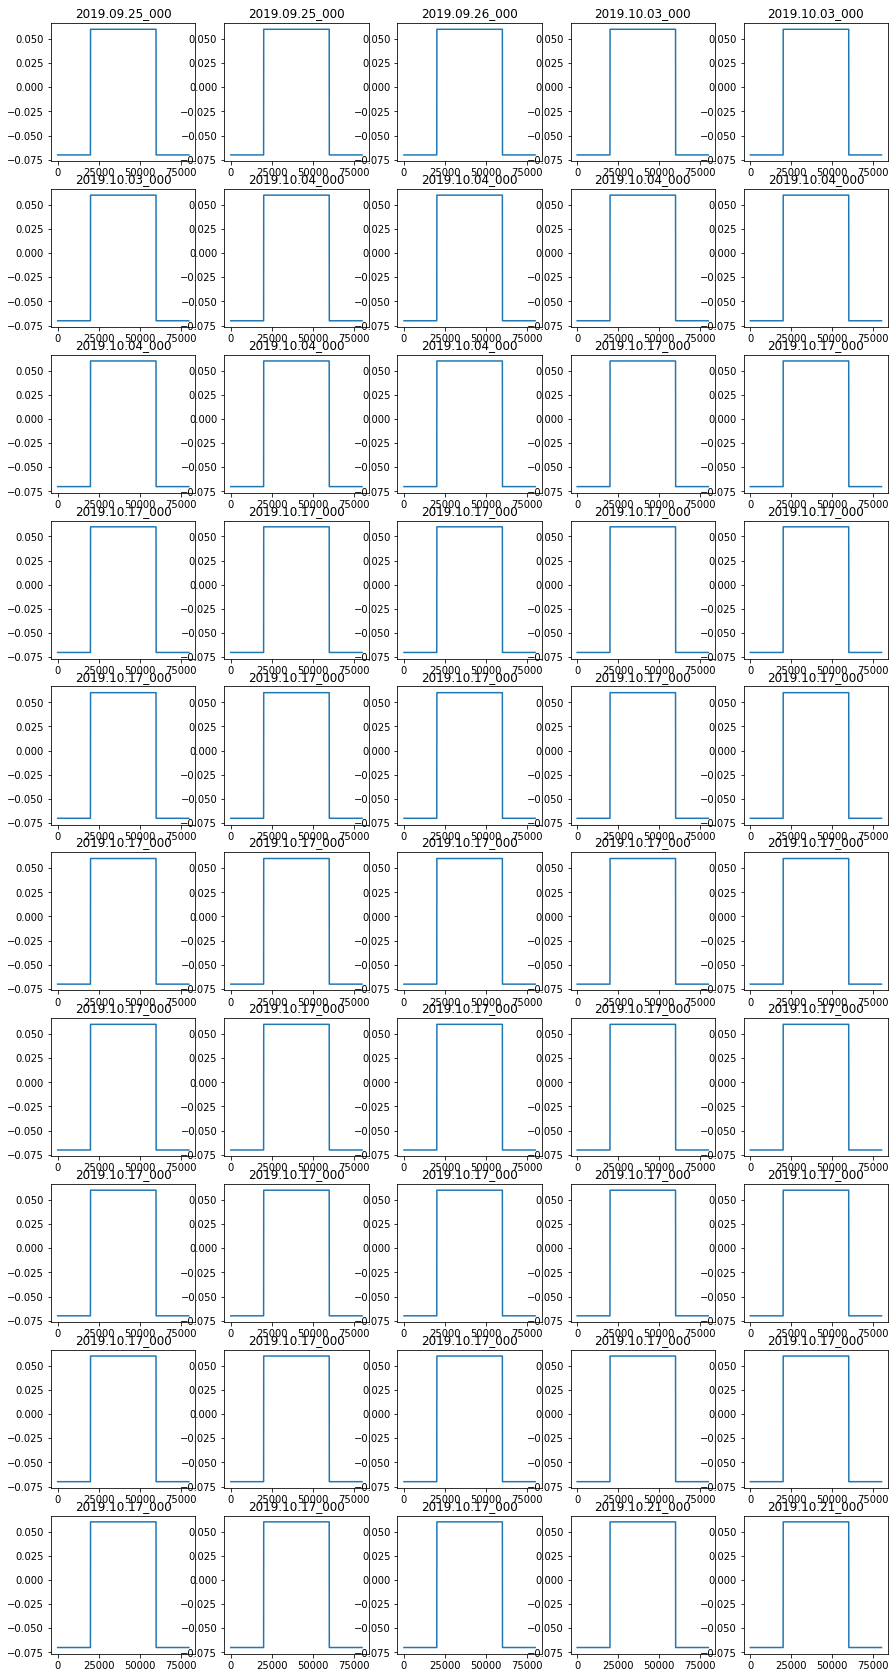

In [29]:
# datePath = pb.getPathInfo(imgPath)
results = {}
fig = plt.figure(figsize=[15,30])
i = 1
for date in datePath:
    platePath = pb.getPathInfo(os.path.join(imgPath, date))
    for plate in platePath:
        cellPath = pb.getPathInfo(os.path.join(imgPath, date, plate))
        for cell in(cellPath):
            if not os.path.exists(os.path.join(rawPath, date, plate, cell)):
                continue
#             print(os.path.join(rawPath, date, plate, cell))
            daqData = os.path.join(rawPath,date,plate,cell,'camera_clamp2_000','008','Clamp2.ma')
            
            if not os.path.exists(daqData):
                daqData = os.path.join(rawPath,date,plate,cell,'camera_clamp1_000','008','Clamp1.ma')    
            daqData = h5py.File(daqData,'r')
            V_SYNC = daqData['data'][()][0]
            ax = fig.add_subplot(10,5,i)
            ax.plot(V_SYNC)
            ax.set_title(date)
            i+=1
            
plt.tight_layout()

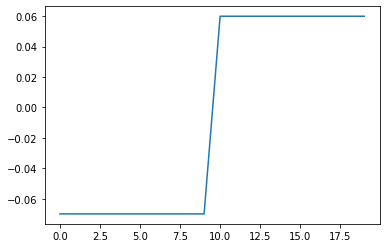

In [17]:
plt.plot(V_SYNC[0][19990:20010])

In [11]:
V_SYNC.shape

(3, 80000)

In [8]:
daqData = os.path.join(rawPath,datePath[0],plate,cell,'camera_clamp1_000','008','Clamp1.ma')

NameError: name 'plate' is not defined

In [ ]:
dataFile = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2020.01.16_000/plate_000/patch_attempt_0000_000/camera_clamp1_000/000/Camera/daqResult.ma'

In [ ]:
data = h5py.File(dataFile,'r')

In [ ]:
np.max(vsync)

In [ ]:
vsync = data['data'][()]

In [ ]:
vsync.shape

In [ ]:
np.max(vsync[1])

In [ ]:
peak_indices = np.where(vsync[1]==1)
peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
peak_index = peak_indices[0][peak_index]
peak_index = peak_index/40.0 # change to ms
print(peak_index.shape)

In [ ]:
for val in "string":
    if val == "i":
        print(val)
        break
    

print("The end")

In [ ]:
daqData['data'][()]